<a href="https://colab.research.google.com/github/Rubylawren/Customer-Churn-Prediction/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, accuracy_score



In [2]:
df = pd.read_csv("/content/sample_data/customer_churn_dataset.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#Drop RowNumber, CustomerId  and surname columns as they are irrelevant
df = df.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1)

**ENCODING CATEGORICAL VARIABLES**

In [6]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
cat_columns = ["Gender", "Geography"]
df = pd.get_dummies(df, drop_first=True).astype(int)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

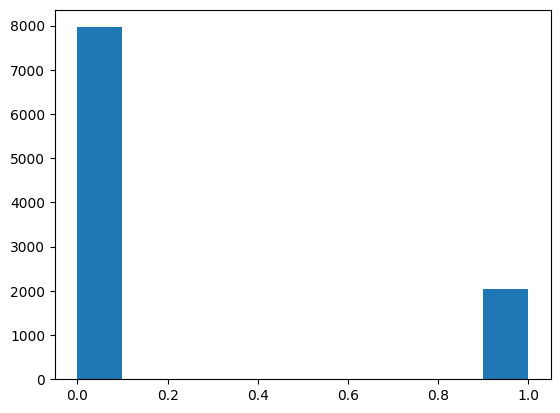

In [10]:
plt.hist(df["Exited"])

In [11]:
#Split dataset into features and target variable
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

**HANDLING IMBALANCES IN THE DATASET**

In [12]:
X_res, y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

 **MODEL TRAINING**

In [13]:
#Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=42)


**FEATURE SCALING**

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-1.24893220e+00, -1.20174320e+00,  7.75354781e-02, ...,
        -5.75779245e-01, -4.65004427e-01, -8.41701757e-01],
       [-4.70457046e-01, -1.60928475e-03, -2.91184937e-01, ...,
         1.73677674e+00, -4.65004427e-01, -8.41701757e-01],
       [ 3.40911427e-01, -1.00172088e+00,  1.55241714e+00, ...,
        -5.75779245e-01,  2.15051716e+00, -8.41701757e-01],
       ...,
       [ 9.96937727e-02, -3.01642764e-01,  4.46255893e-01, ...,
        -5.75779245e-01, -4.65004427e-01, -8.41701757e-01],
       [ 1.10842214e+00,  1.09851347e+00,  4.46255893e-01, ...,
         1.73677674e+00, -4.65004427e-01, -8.41701757e-01],
       [ 4.06698060e-01, -3.01642764e-01,  1.18369672e+00, ...,
        -5.75779245e-01, -4.65004427e-01,  1.18806928e+00]])

**LOGISTIC REGRESSION**

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print(f"accuracy: ", accuracy_score(y_test, lr_preds))
print(f"ROC_AUC: ", roc_auc_score(y_test, lr_preds))
print(f"recall: ", recall_score(y_test, lr_preds))
print(f"precision: ", precision_score(y_test, lr_preds))
print(f"f1 score: ", f1_score(y_test, lr_preds))


accuracy:  0.7890772128060264
ROC_AUC:  0.789464635738505
recall:  0.8048937540244687
precision:  0.7720815318097591
f1 score:  0.7881462799495585


**DECISION TREE CLASSIFIER**

In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_preds = dtc.predict(X_test)
print(f"accuracy: ", accuracy_score(y_test, dtc_preds))
print(f"ROC_AUC: ", roc_auc_score(y_test, dtc_preds))
print(f"recall: ", recall_score(y_test, dtc_preds))
print(f"precision: ", precision_score(y_test, dtc_preds))
print(f"f1 score: ", f1_score(y_test, dtc_preds))

accuracy:  0.7909604519774012
ROC_AUC:  0.7917749223299707
recall:  0.824211204121056
precision:  0.7650926479378363
f1 score:  0.7935523868567885


**RANDOM FOREST CLASSIFIER**

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(f"accuracy: ", accuracy_score(y_test, rf_preds))
print(f"ROC_AUC: ", roc_auc_score(y_test, rf_preds))
print(f"recall: ", recall_score(y_test, rf_preds))
print(f"precision: ", precision_score(y_test, rf_preds))
print(f"f1 score: ", f1_score(y_test, rf_preds))

accuracy:  0.8647206528562461
ROC_AUC:  0.8648955520969823
recall:  0.8718609143593046
precision:  0.8537200504413619
f1 score:  0.8626951258362536


**GRADIENT BOOSTING CLASSIFIER**

In [18]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
print(f"accuracy: ", accuracy_score(y_test, gbc_preds))
print(f"ROC_AUC: ", roc_auc_score(y_test, gbc_preds))
print(f"recall: ", recall_score(y_test, gbc_preds))
print(f"precision: ", precision_score(y_test, gbc_preds))
print(f"f1 score: ", f1_score(y_test, gbc_preds))

accuracy:  0.8427495291902072
ROC_AUC:  0.842579342907018
recall:  0.8358016741790084
precision:  0.8406735751295337
f1 score:  0.8382305456893768


**KNEIGHBOURS CLASSIFIER**

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print(f"accuracy: ", accuracy_score(y_test, knn_preds))
print(f"ROC_AUC: ", roc_auc_score(y_test, knn_preds))
print(f"recall: ", recall_score(y_test, knn_preds))
print(f"precision: ", precision_score(y_test, knn_preds))
print(f"f1 score: ", f1_score(y_test, knn_preds))

accuracy:  0.8185812931575643
ROC_AUC:  0.8191450559512059
recall:  0.8415969092079846
precision:  0.797437461866992
f1 score:  0.818922305764411


**SUPPORT VECTOR MACHINES**

In [20]:
svc = SVC()
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)
print(f"accuracy: ", accuracy_score(y_test, svc_preds))
print(f"ROC_AUC: ", roc_auc_score(y_test, svc_preds))
print(f"recall: ", recall_score(y_test, svc_preds))
print(f"precision: ",precision_score(y_test, svc_preds))
print(f"f1 score: ", f1_score(y_test, svc_preds))


accuracy:  0.8411801632140615
ROC_AUC:  0.8412850067171416
recall:  0.845460399227302
precision:  0.83153894870171
f1 score:  0.8384418901660281


In [21]:
final_data = pd.DataFrame({
    "models": ['LR', "DTC", "RF", "GBC", "KNN", "SVC"],
    "accuracy": [
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, dtc_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, gbc_preds),
        accuracy_score(y_test, knn_preds),
        accuracy_score(y_test, svc_preds)
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, lr_preds),
        roc_auc_score(y_test, dtc_preds),
        roc_auc_score(y_test, rf_preds),
        roc_auc_score(y_test, gbc_preds),
        roc_auc_score(y_test, knn_preds),
        roc_auc_score(y_test, svc_preds)
    ],
     "recall": [
        recall_score(y_test, lr_preds),
        recall_score(y_test, dtc_preds),
        recall_score(y_test, rf_preds),
        recall_score(y_test, gbc_preds),
        recall_score(y_test, knn_preds),
        recall_score(y_test, svc_preds)
    ],
     "precision": [
        precision_score(y_test, lr_preds),
        precision_score(y_test, dtc_preds),
        precision_score(y_test, rf_preds),
        precision_score(y_test, gbc_preds),
        precision_score(y_test, knn_preds),
        precision_score(y_test, svc_preds)
    ],
     "F1 score": [
        f1_score(y_test, lr_preds),
        f1_score(y_test, dtc_preds),
        f1_score(y_test, rf_preds),
        f1_score(y_test, gbc_preds),
        f1_score(y_test, knn_preds),
        f1_score(y_test, svc_preds)
    ]
})
final_data

,models,accuracy,ROC_AUC,recall,precision,F1 score
0,LR,0.789077,0.789465,0.804894,0.772082,0.788146
1,DTC,0.790960,0.791775,0.824211,0.765093,0.793552
2,RF,0.864721,0.864896,0.871861,0.853720,0.862695
3,GBC,0.842750,0.842579,0.835802,0.840674,0.838231
4,KNN,0.818581,0.819145,0.841597,0.797437,0.818922
5,SVC,0.841180,0.841285,0.845460,0.831539,0.838442


**The best performing model is the random forest model, let's use gridsearch to perform parameter tuning**

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf1 = RandomForestClassifier()
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.8674


In [23]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=10, bootstrap=True)
rf1.fit(X_train, y_train)
rf1_preds = rf1.predict(X_test)
print(f"accuracy: ", accuracy_score(y_test, rf1_preds))
print(f"ROC_AUC: ", roc_auc_score(y_test, rf1_preds))
print(f"recall: ", recall_score(y_test, rf1_preds))
print(f"precision: ", precision_score(y_test, rf1_preds))
print(f"f1 score: ", f1_score(y_test, rf1_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


accuracy:  0.8590709353421218
ROC_AUC:  0.8591318621998234
recall:  0.8615582743077914
precision:  0.851145038167939
f1 score:  0.85632


**Parameter tuning didnt yield better results so we stick to the initial model**

In [24]:
#Applying feature importance
rf.fit(X_res, y_res)
importances = rf.feature_importances_
feature_names = X_res.columns
feature_importance_df = pd.DataFrame({
    "features": feature_names,
    "importance": importances
}).sort_values(by='importance', ascending = False)

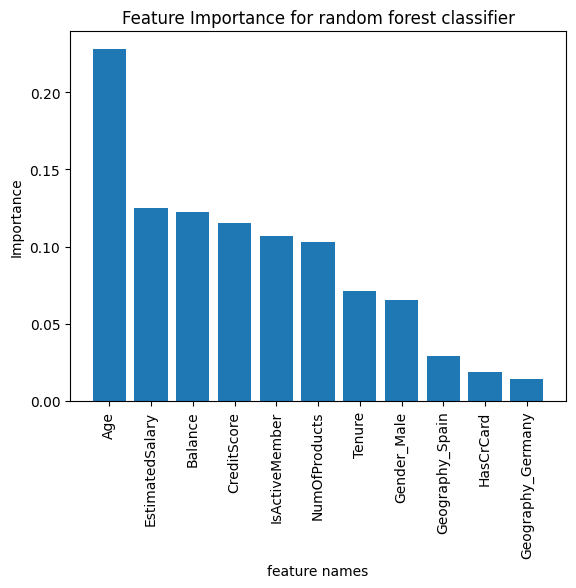

In [25]:
plt.bar(feature_importance_df["features"], feature_importance_df["importance"])
plt.xlabel("feature names")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Feature Importance for random forest classifier")
plt.show()

In [26]:
feature_importance_df


,features,importance
1,Age,0.227971
7,EstimatedSalary,0.124960
3,Balance,0.122541
0,CreditScore,0.115302
6,IsActiveMember,0.106961
4,NumOfProducts,0.103127
2,Tenure,0.071133
10,Gender_Male,0.065592
9,Geography_Spain,0.029065
5,HasCrCard,0.018950


**SAVE THE MODEL**

In [27]:
import joblib
joblib.dump(rf, "churn_prediction_model")
model = joblib.load("churn_prediction_model")

In [28]:
preds = model.predict([[619,42,2,0,1,1,1,101348,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
if preds == 0:
  print("customer will not churn")
else:
    print("customer will churn")

customer will churn
